In [1]:
import pandas as pd
import numpy as np
from functools import reduce

from scipy import stats
from matplotlib import pyplot as plt
from pandas_datareader import data, wb
import pandas_datareader.data as web

In [2]:
Excel_Writer = pd.ExcelWriter('result.xlsx')

In [3]:
x1=pd.ExcelFile("Pet.xls")
x1.sheet_names

['Contents',
 'Data 1',
 'Data 2',
 'Data 3',
 'Data 4',
 'Data 5',
 'Data 6',
 'Data 7']

In [4]:
df1=x1.parse('Data 1')
df2=x1.parse('Data 2')
df3=x1.parse('Data 3')
df4=x1.parse('Data 4')
df5=x1.parse('Data 5')
df6=x1.parse('Data 6')
df7=x1.parse('Data 7')

In [5]:
def rename_col_header(df):
    df.columns = df.iloc[1]
    df.drop(df.index[[0,1]],  inplace=True)
    # Set Date column to datetime for time series
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y %b, %d')
    # Just making sure that all the files are sorted by date
    df = df.sort_values(by='Date', ascending=True)
    #df.set_index('Date', inplace=True)

In [6]:
rename_col_header(df1)
rename_col_header(df2)
rename_col_header(df3)
rename_col_header(df4)
rename_col_header(df5)
rename_col_header(df6)
rename_col_header(df7)

In [7]:
data_frames = [df1, df2, df3, df4, df5, df6, df7]

In [8]:
#merging all dfs to analyze them together
df_merged = reduce(lambda  left,right: pd.merge(left,right,on='Date',how='left'), data_frames)

In [9]:
df_merged.set_index('Date', inplace=True)
#df_merged.head()

In [10]:
#converting the columns to float to see stats
for col in [df_merged.columns]:
    df_merged[col] = df_merged[col].astype('float')

In [11]:
df_merged.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
1,,,,,,,,
"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",397.0,43.808791,29.460501,11.350,19.66000,29.8400,63.80000,133.880
Europe Brent Spot Price FOB (Dollars per Barrel),381.0,46.000394,33.013959,9.820,18.67000,30.2000,67.49000,132.720
New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),392.0,1.267541,0.829709,0.307,0.55675,0.8865,1.91925,3.292
U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),392.0,1.238556,0.813193,0.294,0.54875,0.8635,1.86600,3.284
Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon),188.0,2.147021,0.631317,0.949,1.64200,2.0790,2.66850,3.694
New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon),392.0,1.278319,0.885156,0.304,0.53975,0.8400,1.86700,3.801
New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon),152.0,2.291855,0.672420,0.979,1.79475,2.1380,2.95900,3.887
U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon),152.0,2.244559,0.667094,0.958,1.76875,2.1050,2.91400,3.851
"Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)",274.0,1.711139,0.882817,0.391,0.87225,1.6630,2.28550,3.894


In [12]:
#To calculate monthly and yearly change

#df_merged['WTI_monthly_price_change']=df_merged['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)']-df_merged['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].shift(1)
#data['WTI Crude'].diff().head(10)
#data['WTI Crude'].pct_change().head(10)
#df_merged['WTI_yearly_price_change']=df_merged['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)']-df_merged['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].shift(12)
#data['WTI Crude'].diff(12).head(10)

### Prices of WTI and Brent Crude oil are quite similar, we can consider any one for more analysis.

/Users/neha/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


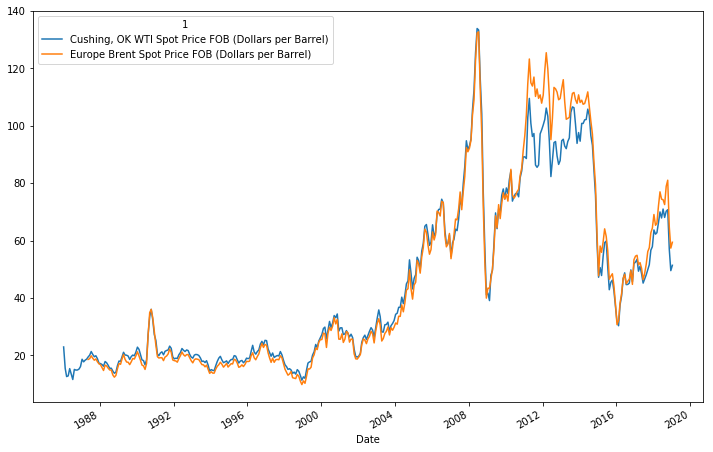

In [13]:
df_merged.plot(y=['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)', 'Europe Brent Spot Price FOB (Dollars per Barrel)'], figsize=(12,8))

The spot prices of crude oil have been profoundly influenced by events that have economic and geo-political aspects.

1. the remarkable price falls in the period 1997–1998, due to the slowdown of Asian economic growth;

2. OPEC (Organization of Petroleum Export Countries) curtailed the production of crude oil by 4.2 million barrels per day between 2000 and 2001, resulting in an increase in crude oil prices;

3. In 2001-2003, 911 attacks and the invasion of Iraq raise concerns about the stability of the Middle East’s production.

4. Then, Crude oil prices keep rising for a variety of reasons, including North Korea’s missile launches, the crisis between Israel and Lebanon, and Iranian nuclear brinksmanship.

5. In 2008, The global financial crisis causes a bubble-bursting sell-off. Prices plummet 78.1% from July to December.

6. In 2014, Strong production in the United States and Russia cause prices to crash from July to December. OPEC’s November decision to maintain production further damages the market heading into 2015.

7. In 2015, U.S. output reaches its highest level in more than 100 years. Prices hover near $50 a barrel as of July 22.

## Insight I : OPEC price war with the US affected the prices from 2014 and January 2016 was lowest price in last 12 years (2003- Jan 2016)

### In 2014, Strong production in the United States and Russia caused prices to crash from July to December. OPEC’s November decision to maintain production further damaged the market heading into 2015.

### In 2015, U.S. output reached its highest level in more than 100 years.

In [14]:
data2016 = df_merged[df_merged.index>'2014-05-15']

/Users/neha/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


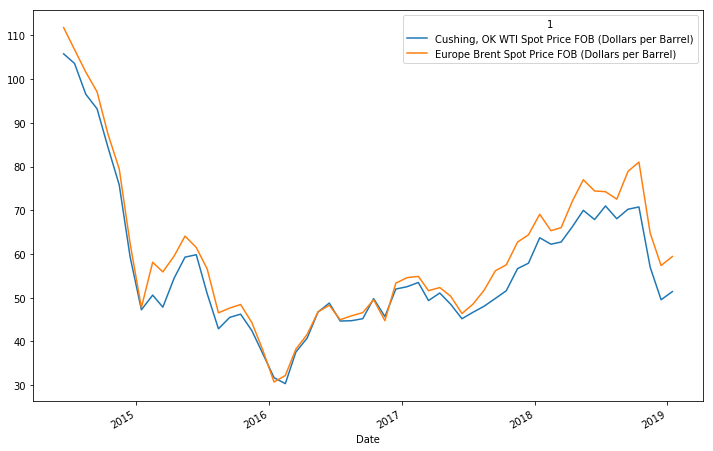

In [15]:
data2016.plot(y=['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)','Europe Brent Spot Price FOB (Dollars per Barrel)'], figsize=(12,8))

## Insight II : 2008 Global Financial Crisis caused the prices to fall remarkably

### In 2008, The global financial crisis caused a bubble-bursting sell-off. Prices plummet 78.1% from July to December.

In [16]:
data2008 = df_merged[(df_merged.index>'2007-01-15') & (df_merged.index<'2009-06-15')]

/Users/neha/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


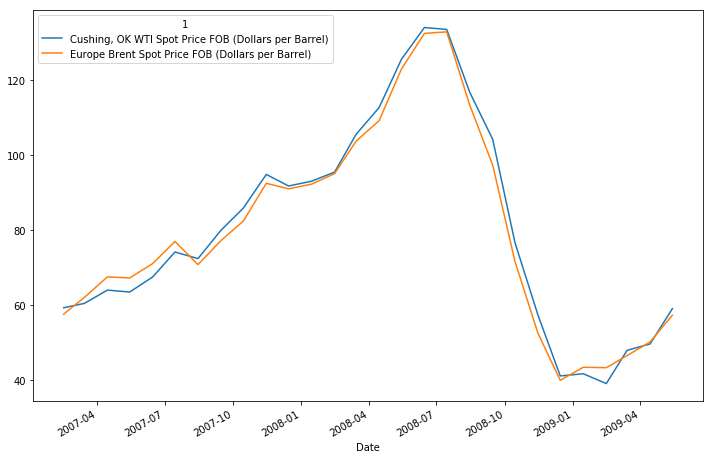

In [17]:
data2008.plot(y=['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)','Europe Brent Spot Price FOB (Dollars per Barrel)'], figsize=(12,8))

## Insight III : In 2001, there was a small price dip and then prices kept increasing

### In 2001, 9/11 attack and the invasion of Iraq raise concerns about the stability of the Middle East’s production.

### Then, Crude oil prices kept rising for a variety of reasons including North Korea’s missile launches, the crisis between Israel and Lebanon and Iranian nuclear brinksmanship.

In [18]:
data2001 = df_merged[(df_merged.index>'2001-01-15') & (df_merged.index<'2007-01-15')]

/Users/neha/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


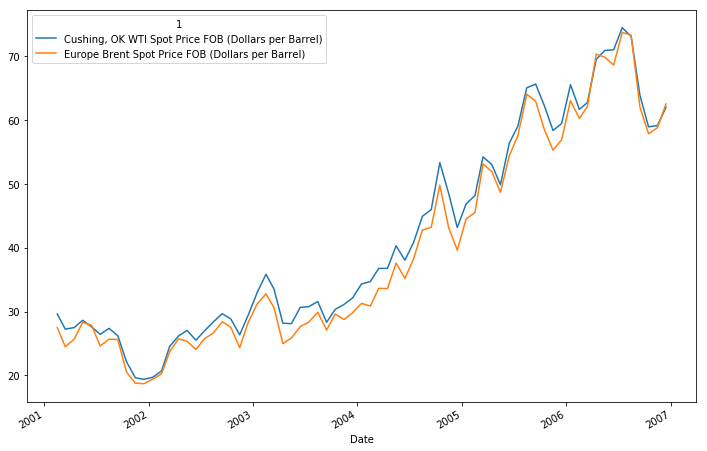

In [19]:
data2001.plot(y=['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)','Europe Brent Spot Price FOB (Dollars per Barrel)'], figsize=(12,8))

## Insight IV : OPEC decision led to an increase in prices in 2000

### OPEC (Organization of Petroleum Export Countries) curtailed the production of crude oil by 4.2 million barrels per day between 2000 and 2001, resulting in an increase in crude oil prices.

In [20]:
data2000 = df_merged[(df_merged.index>'1999-02-15') & (df_merged.index<'2001-01-15')]

/Users/neha/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


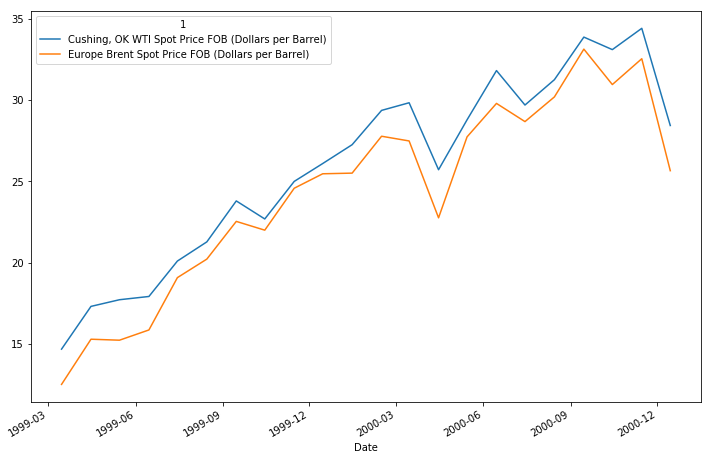

In [21]:
data2000.plot(y=['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)','Europe Brent Spot Price FOB (Dollars per Barrel)'], figsize=(12,8))

## Insight V : Prices fell remarkably in the period 1997–1998, due to the slowdown of Asian economic growth.

In [22]:
data1997 = df_merged[(df_merged.index>'1996-10-15') & (df_merged.index<'1999-03-15')]

/Users/neha/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


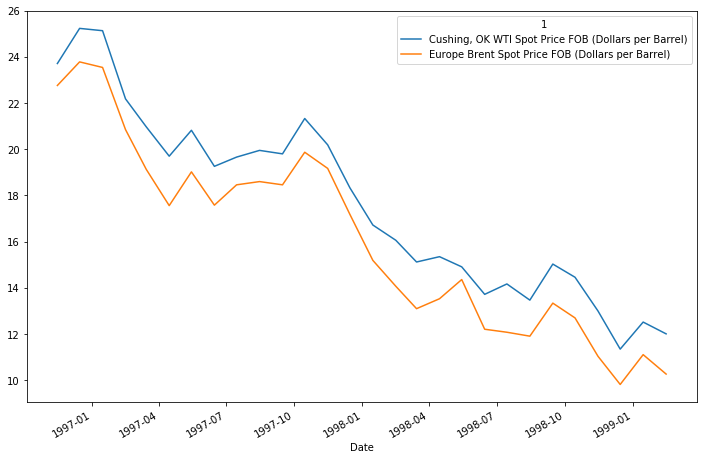

In [23]:
data1997.plot(y=['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)','Europe Brent Spot Price FOB (Dollars per Barrel)'], figsize=(12,8))

### Price prediction using ML

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error

### Method where different machine learning models are trained and comparitive study is done
def trainModels(file, imp_attr):
    #split into train and test
    train, test =  train_test_split(file, test_size = 0.2)

    #Removing the target/predictor from the train data
    targ = train[list(target_col)]
    
    ### Random Forest Model
    rand_forest_model =  RandomForestRegressor(n_estimators = 1000 , max_features = 2, oob_score = True ,  random_state = 115)
    rand_forest_model.fit(train[list(imp_attr)],targ)
    
    ### Decision Tree Model
    decision_tree_model = DecisionTreeRegressor(max_depth=4)
    decision_tree_model.fit(train[list(imp_attr)],targ)    
   
    ### Linear Regression Model
    linear_model = LinearRegression()
    linear_model.fit(train[list(imp_attr)], targ)
    
    return rand_forest_model, decision_tree_model, linear_model, test

In [25]:
#### Method which tests the given model and Prints out the statistics regarding each of them
def  testNEvalModels(test, rf_model, dt_model, lm_model, imp_attr):
   
    print('\n Evaluation Staistics:')
    ### Evaluating Random Forest
    print("\n ***Random Forest Regressor***")
    #Evaluation metric: r square
    r2 = r2_score(test[list(target_col)] , rf_model.predict(test[list(imp_attr)]))
    print("R-Square Value:", r2)
    
    # extracting the test target values and convert to float
    true_vals = test[list(target_col)].values
    true_vals_flt = true_vals.astype(np.float)
    
    prediction = rf_model.predict(test[list(imp_attr)])
    
    #reshaping the array is required to convert it into numpy array
    aa = prediction.reshape(-1,1)
    
    mean_squared_error(true_vals_flt, prediction)
    
    mse = np.mean((true_vals_flt - aa)**2)
    print("Mean Squared Error", mse)
    
    print("Explained Variance Score", explained_variance_score(true_vals_flt, prediction))     
    print("Mean Absolute Error", mean_absolute_error(true_vals_flt, prediction))
    print("Median Absolute Error", median_absolute_error(true_vals_flt, prediction))    
    
    ### Evaluating Decision tree
    print("\n ***Decision Tree Regressor***")
    y_2 = dt_model.predict(test[list(imp_attr)])
    r2_dt = r2_score(true_vals_flt , y_2)
    print("R-Square Value:", r2_dt)
    
    print("Mean Squared Error", mean_squared_error(true_vals_flt, y_2))  
    
    print("Explained Variance Score", explained_variance_score(true_vals_flt, y_2))     
    print("Mean Absolute Error", mean_absolute_error(true_vals_flt, y_2))
    print("Median Absolute Error", median_absolute_error(true_vals_flt, y_2))    
    
    
    ### Evaluating Linear Model
    print("\n ***Linear Regression Model***")
    pred_lm = lm_model.predict(test[list(imp_attr)])

    r2_lm = r2_score(true_vals_flt, pred_lm)
    
    print("R-Square Value:", r2_lm)
    
    print("Mean Squared Error", mean_squared_error(true_vals_flt, pred_lm))  
    
    print("Explained Variance Score", explained_variance_score(true_vals_flt, pred_lm))     
    print("Mean Absolute Error", mean_absolute_error(true_vals_flt, pred_lm))
    print("Median Absolute Error", median_absolute_error(true_vals_flt, pred_lm))    

In [26]:
#### The chosen model is then applied to predict the future crude oil prices
def applyModel(model, test):
    #Apply selected model to test data
    pred = model.predict(test[list(imp_attr)])

    #save predicted into target column in test
    test_dtm['Predicted Price'] = pred
    
    #save df to file
    test_dtm.to_csv("predicted_price.csv")

In [27]:
def month_year_sep(df):
    df['month']=df['Date'].apply(lambda x: x.month)
    df['year']=df['Date'].apply(lambda x: x.year)

In [28]:
for df in data_frames:
    month_year_sep(df)

In [29]:
for i in range(7):
     data_frames[i].to_excel(Excel_Writer,'data'+str(i))
Excel_Writer.save()

In [30]:
df1['monthly_change'] = df1['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].diff()

In [31]:
df1.head()

1,Date,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",Europe Brent Spot Price FOB (Dollars per Barrel),month,year,monthly_change
2,1986-01-15,22.93,NaN,1,1986,NaN
3,1986-02-15,15.46,NaN,2,1986,-7.47
4,1986-03-15,12.61,NaN,3,1986,-2.85
5,1986-04-15,12.84,NaN,4,1986,0.23
6,1986-05-15,15.38,NaN,5,1986,2.54


In [32]:
##### Code to predict the next 6 months Prices 

#Crude oil data being taken as input
train_data = df1
target_col = ['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)']

#features selected on which the model would be based on
imp_attr = ['month','year']

# Training different models and choosing the best one for prediction
rf,dt,lm,test = trainModels(train_data, imp_attr)
testNEvalModels(test, rf, dt, lm, imp_attr)

/Users/neha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



 Evaluation Staistics:

 ***Random Forest Regressor***
R-Square Value: 0.9330369088283709
Mean Squared Error 49.14003677575239
Explained Variance Score 0.9340532870033124
Mean Absolute Error 4.124009124999953
Median Absolute Error 1.9471650000002239

 ***Decision Tree Regressor***
R-Square Value: 0.9087565020211574
Mean Squared Error 66.95791319932769
Explained Variance Score 0.9122043417718669
Mean Absolute Error 5.266517729785313
Median Absolute Error 3.1748308270676606

 ***Linear Regression Model***
R-Square Value: 0.5789329556686873
Mean Squared Error 308.9948459885991
Explained Variance Score 0.5803776023329827
Mean Absolute Error 14.313486167818676
Median Absolute Error 11.84245187456774


In [33]:
#create test data for next 6 months
test_dtm={}
test_dtm['month']=[2,3,4,5,6,7]
test_dtm['year']=[2019, 2019, 2019, 2019, 2019, 2019]
test_dtm = pd.DataFrame.from_dict(test_dtm)

# As per the Evaluation Statistics we get to know that Random Forest 
# is performing better than other considered models, so we apply rf to test data
applyModel(rf, test_dtm)

### Correlation

In [34]:
df2.head()

1,Date,New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),month,year
2,1986-06-15,0.42,0.409,6,1986
3,1986-07-15,0.34,0.334,7,1986
4,1986-08-15,0.426,0.416,8,1986
5,1986-09-15,0.42,0.398,9,1986
6,1986-10-15,0.41,0.4,10,1986


### The prices are highly positively correlated

In [35]:
# Converting the columns to float for performing correlation

df2['New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)']=np.float64(df2['New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'])
df2['U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)']=np.float64(df2['U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'])
df2['New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'].corr(df2['U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'])

0.9980294191948083

In [36]:
# Correlation matrix
np.corrcoef(df2['New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'], df2['U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'])

array([[1.        , 0.99802942],
       [0.99802942, 1.        ]])

/Users/neha/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,1,'Correlation')

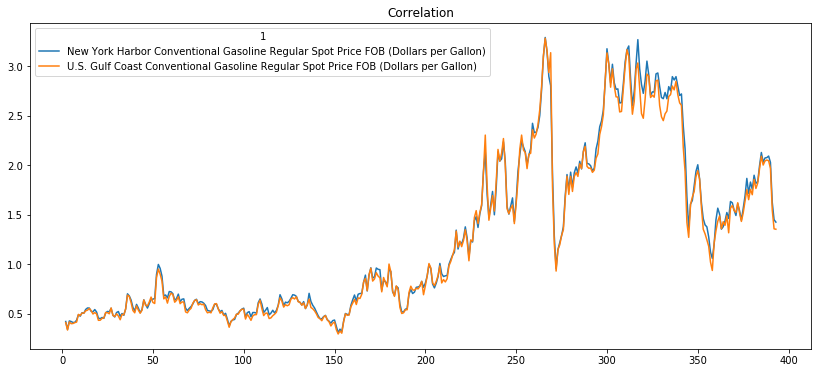

In [37]:
df2.plot(y=['New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)','U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'], figsize=(14,6))
plt.title('Correlation')

### Analyzing if there is a month where the prices of all products are lower than prior data points

In [38]:
df1.head()

1,Date,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",Europe Brent Spot Price FOB (Dollars per Barrel),month,year,monthly_change
2,1986-01-15,22.93,NaN,1,1986,NaN
3,1986-02-15,15.46,NaN,2,1986,-7.47
4,1986-03-15,12.61,NaN,3,1986,-2.85
5,1986-04-15,12.84,NaN,4,1986,0.23
6,1986-05-15,15.38,NaN,5,1986,2.54


In [39]:
df1['cumulative_min']=df1['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].cummin()

In [40]:
df1.head()

1,Date,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",Europe Brent Spot Price FOB (Dollars per Barrel),month,year,monthly_change,cumulative_min
2,1986-01-15,22.93,NaN,1,1986,NaN,22.93
3,1986-02-15,15.46,NaN,2,1986,-7.47,15.46
4,1986-03-15,12.61,NaN,3,1986,-2.85,12.61
5,1986-04-15,12.84,NaN,4,1986,0.23,12.61
6,1986-05-15,15.38,NaN,5,1986,2.54,12.61
